# Question 2 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

# Introduction

The goal of this exercise is to find the eigenvalues and model the eigenfunctions of an asymmetric quantum well. The first parts of the exercise (defining the hamiltonian) have already been done. We now computationally find the eigenvalues and eigenvectors.

# Part B

In [1]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from math import pi , sin

To make things simple, we will perform all of our calculations in $eV$ units. On top of this, we can simplify further by adopting natural units so that $\hbar = 1$ by absorbing the constant $\hbar$ into the definition of distance. The conversions are as following:

Distance is measured in $\frac{\hbar c}{eV}$ (where $1$m $= 5.06773021431 \times 10^6 \frac{\hbar c}{eV}$)

Mass is measured in $\frac{eV}{c^2}$ (where $m_e = 5.109989461 \times 10^5 \frac{eV}{c^2}$)

for more information, visit: https://en.wikipedia.org/wiki/Electronvolt

This modifies our Hamiltonian to the following (note absence of $\hbar$):

\begin{equation} H_{mn} = 
  \begin{cases}
                                   0 & \text{if $m \neq n$ and both even/odd} \\
     -\frac{8amn}{\pi^2(m^2-n^2)^2}  & \text{if $m \neq n$ one even, one odd} \\
  \frac{1}{2}a + \frac{\pi^2 m^2}{2ML^2} & \text{if $m=n$}
  \end{cases}
\end{equation}

In [2]:
# define given constants in eV units
L = 2.5338651e-3 # units of hbar c / eV
a = 10. # units of eV
mass = 5.109989461e5 # mass of electron, units of eV / c^2
# Note: we do not need hbar, but define it anyway (why not)
hbar = 6.58211928e-16 # units of eV s

def H(m,n):
    ''' Function to return Hamiltonian nmth element
    Check for 3 different cases of n and m'''
    # First check if n = m
    if n == m: 
        return a/2 + (pi**2*m**2)/(2*mass*L**2)
    # Next check if n,m both even or both odd
    elif (n%2 == 0 and m%2 == 0) or (n%2 == 1 and m%2 == 1):
        return 0.
    # If else, then one has to be odd and one even
    else:
        return - (8*a*m*n)/(pi**2*(m**2-n**2)**2)

# Part C

We now want to use our function to calculate the first few eigenvalues of the well. To do this we can define a $10 \times 10$ matrix and call our H function to caluclate the values in each cell. After that we simply call the np.linalg.eigvalsh function to compute the eigenvalues.

In [3]:
# Set 10x10 Matrix by calling H(m,n) for each cell
Hamiltonian = [[H(m+1,n+1) for n in range(10)] for m in range(10)]

In [4]:
# Calculate eigenvalues of matrix using inbuilt np.linalg.eigvalsh
# Note: we use eigvalsh instead of eigvals because Hamiltonian
# is guaranteed to be Hermitian by construction. (Also it's faster)
eigvals = np.linalg.eigvalsh(Hamiltonian)
print(eigvals)

[   5.83637734   11.18109416   18.66289441   29.14420283   42.65508278
   59.18526925   78.72937576  101.28550417  126.85141149  155.55536061]


# Part D

That worked pretty well for a $10 \times 10$ matrix, but we want to make this as realistic as possible, and in reality we are working with an infinite dimensional Hilbert space! We will try again with a $100 \times 100$ matrix and compare the values we get.

In [5]:
# Set 100x100 Matrix by calling H(m,n) for each cell
Hamiltonian2 = [[H(m+1,n+1) for n in range(100)] for m in range(100)]

In [6]:
# Calculate eigenvalues of matrix using inbuilt np.linalg.eigvalsh
# Note: we use eigvalsh instead of eigvals because Hamiltonian
# is guaranteed to be Hermitian by construction. (Also its faster)
eigvals2 = np.linalg.eigvalsh(Hamiltonian2)
print(eigvals2[:10]) # print only first 10 values

[   5.83637694   11.18109284   18.66289254   29.14419403   42.65507366
   59.18521667   78.72932393  101.28487324  126.85057916  155.42573817]


We notice that the eigenvalues are almost the exact same, in fact the differences between them (as computed below) are on order magnitude much smaller than the actual values, meaning the relative error is quite small. We thus conclude that even though we were restricting our Hilbert space to only 10 dimensions, the approximation was still reasonable. Furthermore, we can conclude that the calculation of eigenvalues by np.linalg.eigvalsh is very precise, returning very similar values despite having a very different matrix. (Unsurprisingly though, really, becuase this function has been optimized to be very reliable)

In [7]:
# Just for fun, print the difference difference between the 10x10
# matrix's eigenvalues and the 100x100 matrix's eigenvalues
print(abs(eigvals2[:10]-eigvals))

[  4.00675424e-07   1.32326890e-06   1.87100970e-06   8.79964731e-06
   9.12010751e-06   5.25829827e-05   5.18270406e-05   6.30930937e-04
   8.32325438e-04   1.29622441e-01]


# Part E

We now want to plot the eigenfunctions (wavefunctions) of the well $\psi_n(x)$. To do this we recall our basis $\psi_n(x) = \sum_{n=1}^\infty \psi_n \sin \frac{\pi n x}{L}$. When we find the eigenvectors of our Hamiltonian matrix, we are solving for the coefficients $\psi_n$ in this basis. Thus to plot our wavefunctions, we must reconstruct the wavefunctions from these coefficients using the equation above.

In [8]:
# store eigenvectors of the Hamiltonian, calculated using np.linalg.eigh
# we take the second output, ignoring the first which returns eigenvalues
# Note: for accuracy, use the larger Matrix's eigenvectors, although
# the result differences will likely be negligible anyway
eigvecs = - np.linalg.eigh(Hamiltonian2)[1]
# I added a negative because overall phase does not matter, and we are
# getting negative values. I am correcting for the incorrect sign here

# We now want to store these coefficiants for each independent energy level
# initialize empty lists to store the coefficients
state0 = []
state1 = []
state2 = []
# loop through eigenvector output and sort the coefficients by energy level
for i in range(len(eigvecs)):
    state0.append(eigvecs[i][0])
    state1.append(eigvecs[i][1])
    state2.append(eigvecs[i][2])

# define a function to calculate the wavefunctions for a particular energy
def calcstate(coefficients,xvals):
    '''Calculates wavefunction of quantum well for a particular energy level
    INPUT: coefficients of fourier basis (calculated eigenvectors), x values
    along which to output wavefunction values
    OUTPUT: y values for wavefunction corresponding to inputted x values'''
    yvals = np.empty(len(xvals)) # initialize array to store y values
    for i in range(len(xvals)): # loop for all x values
        sum = 0. # initialize sum
        for j in range(len(coefficients)): # loop for all coefficients
            # add weighted sin series function to build \psi_n(x)
            sum += coefficients[j]*sin(pi*(j+1)*xvals[i])
        yvals[i] = sum # store total sum for each y value
        
    # Before we finish, we also want to normalize the wavefunction
    # Do to this we will integrate the probability amplitude and set it to 1
    # We integrate using numpy's built-in trapezoidal integration 
    # (it is crude but fast - good enough for our purposes!)
    integral = np.trapz(yvals**2,x=xvals) # integrate \psi_n(x)^2 over all x
    return yvals/np.sqrt(integral) # return normalized y values

We are now ready to plot the wavefunctions and probability amplitudes for our quantum well. To make the visualization easier, we will plot the $x$ axis in units of $x/L$ (so that $x \in [0,1]$). We first plot the wavefunctions, and then plot the probability amplitudes. For comparison we will also plot the unperturbed wavefunctions of a classical symmetric quantum well using the well known wavefunctions $\psi_n^\text{sym}(x) = \sqrt{\frac{2}{L}} \sin \frac{\pi n x}{L}$

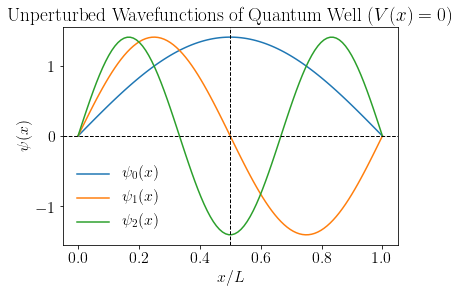

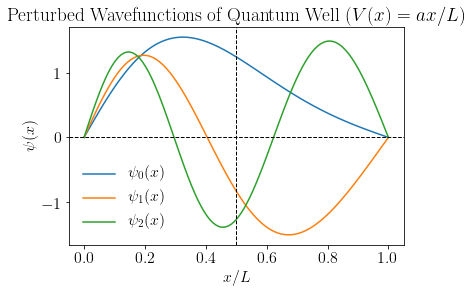

In [9]:
xvals = np.linspace(0,1,100) # define x where we will plot in units of x/L

# define unperturbed symmetric wavefunctions
unperturbed0 = np.empty(len(xvals)) # define lists to store y values
unperturbed1 = np.empty(len(xvals))
unperturbed2 = np.empty(len(xvals))
for i in range(len(xvals)): # calculate and store y values
    unperturbed0[i] = np.sqrt(2)*sin(pi*xvals[i])
    unperturbed1[i] = np.sqrt(2)*sin(pi*2*xvals[i])
    unperturbed2[i] = np.sqrt(2)*sin(pi*3*xvals[i])

# use LaTeX, set global settings for plots 
plt.rc('font', family='serif')
plt.rc('font', size=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', frameon=False)
#plt.rc('xtick.major', pad=7)
#plt.rc('xtick.minor', pad=7)
plt.rc('text', usetex=True)
#plt.rc('legend', numpoints=1)
#plt.rc('legend', handlelength=1.5)
#plt.rc('lines', lw=1.5)

# Plot unperturbed symmetric wavefunctions
plt.figure()
plt.plot(xvals,unperturbed0,label=r'$\psi_0(x)$')
plt.plot(xvals,unperturbed1,label=r'$\psi_1(x)$')
plt.plot(xvals,unperturbed2,label=r'$\psi_2(x)$')
plt.axhline(y=0.0, color='black', linestyle='--',linewidth=1)
plt.axvline(x=0.5, color='black', linestyle='--',linewidth=1)
plt.legend(loc='best')
plt.title(r'Unperturbed Wavefunctions of Quantum Well ($V(x) = 0$)')
plt.xlabel(r'$x/L$')
plt.ylabel(r'$\psi(x)$')
plt.show()

# Plot perturbed asymmetric wavefunctions, V=ax/L
plt.figure()
plt.plot(xvals,calcstate(state0,xvals),label=r'$\psi_0(x)$')
plt.plot(xvals,calcstate(state1,xvals),label=r'$\psi_1(x)$')
plt.plot(xvals,calcstate(state2,xvals),label=r'$\psi_2(x)$')
plt.axhline(y=0.0, color='black', linestyle='--',linewidth=1)
plt.axvline(x=0.5, color='black', linestyle='--',linewidth=1)
plt.legend(loc='best')
plt.title(r'Perturbed Wavefunctions of Quantum Well ($V(x) = ax/L$)')
plt.xlabel(r'$x/L$')
plt.ylabel(r'$\psi(x)$')
plt.show()

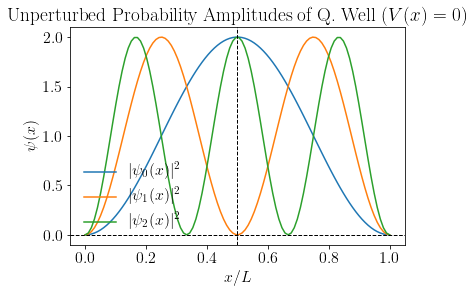

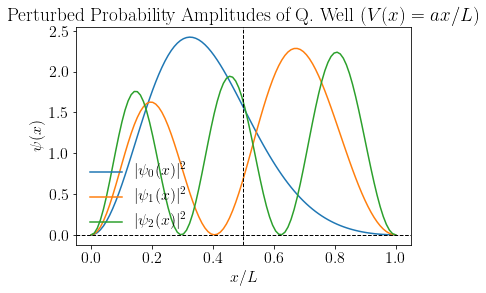

In [10]:
# Do the same but for probability amplitudes

# Plot unperturbed symmetric wavefunction prob amplitudes
plt.figure()
plt.plot(xvals,unperturbed0**2,label=r'$|\psi_0(x)|^2$')
plt.plot(xvals,unperturbed1**2,label=r'$|\psi_1(x)|^2$')
plt.plot(xvals,unperturbed2**2,label=r'$|\psi_2(x)|^2$')
plt.axhline(y=0.0, color='black', linestyle='--',linewidth=1)
plt.axvline(x=0.5, color='black', linestyle='--',linewidth=1)
plt.legend(loc='lower left')
plt.title(r'Unperturbed Probability Amplitudes of Q. Well ($V(x) = 0$)')
plt.xlabel(r'$x/L$')
plt.ylabel(r'$\psi(x)$')
plt.show()

# Plot perturbed asymmetric wavefunction prob amplitudes, V=ax/L
plt.figure()
plt.plot(xvals,calcstate(state0,xvals)**2,label=r'$|\psi_0(x)|^2$')
plt.plot(xvals,calcstate(state1,xvals)**2,label=r'$|\psi_1(x)|^2$')
plt.plot(xvals,calcstate(state2,xvals)**2,label=r'$|\psi_2(x)|^2$')
plt.axhline(y=0.0, color='black', linestyle='--',linewidth=1)
plt.axvline(x=0.5, color='black', linestyle='--',linewidth=1)
plt.legend(loc='lower left')
plt.title(r'Perturbed Probability Amplitudes of Q. Well ($V(x) = ax/L$)')
plt.xlabel(r'$x/L$')
plt.ylabel(r'$\psi(x)$')
plt.show()

We see that the effect of a linear potential accross the well is to shift the unperturbed wavefunctions to the left, away from the potential. In places where the potential is now higher, the probability amplitude is now lower. This is exactly as we would expect.